<img src = "https://images2.imgbox.com/32/ac/wucGkuem_o.png" width="300">

# Aula 2

In [1]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 3

In [6]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36454259456819194


# Aula 4

In [7]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0761660873408905


# Aula 5

In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.794224707802


# Aula 6

In [9]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [10]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [11]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645219978094767 1.075960881095707 3431.8011174859953


In [12]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.25215755278634144 1.221258479833919 1615.2201270648202


In [13]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039723544721636805 3.460934255620407 301.97132501510663
0.3645219978094767 1.075960881095707 3431.8011174859953


In [14]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.056334697944936 1204.111582769171
0.3539000693346332 1.1387697716670149 1194.9556797171288
0.36704573758244236 1.0990426578873274 1167.5322875560994


# Aula 7

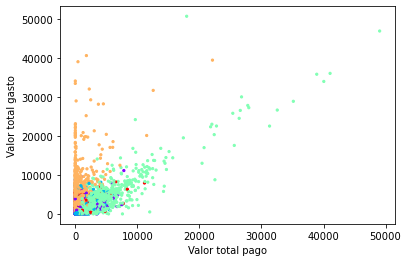

In [15]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela

import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

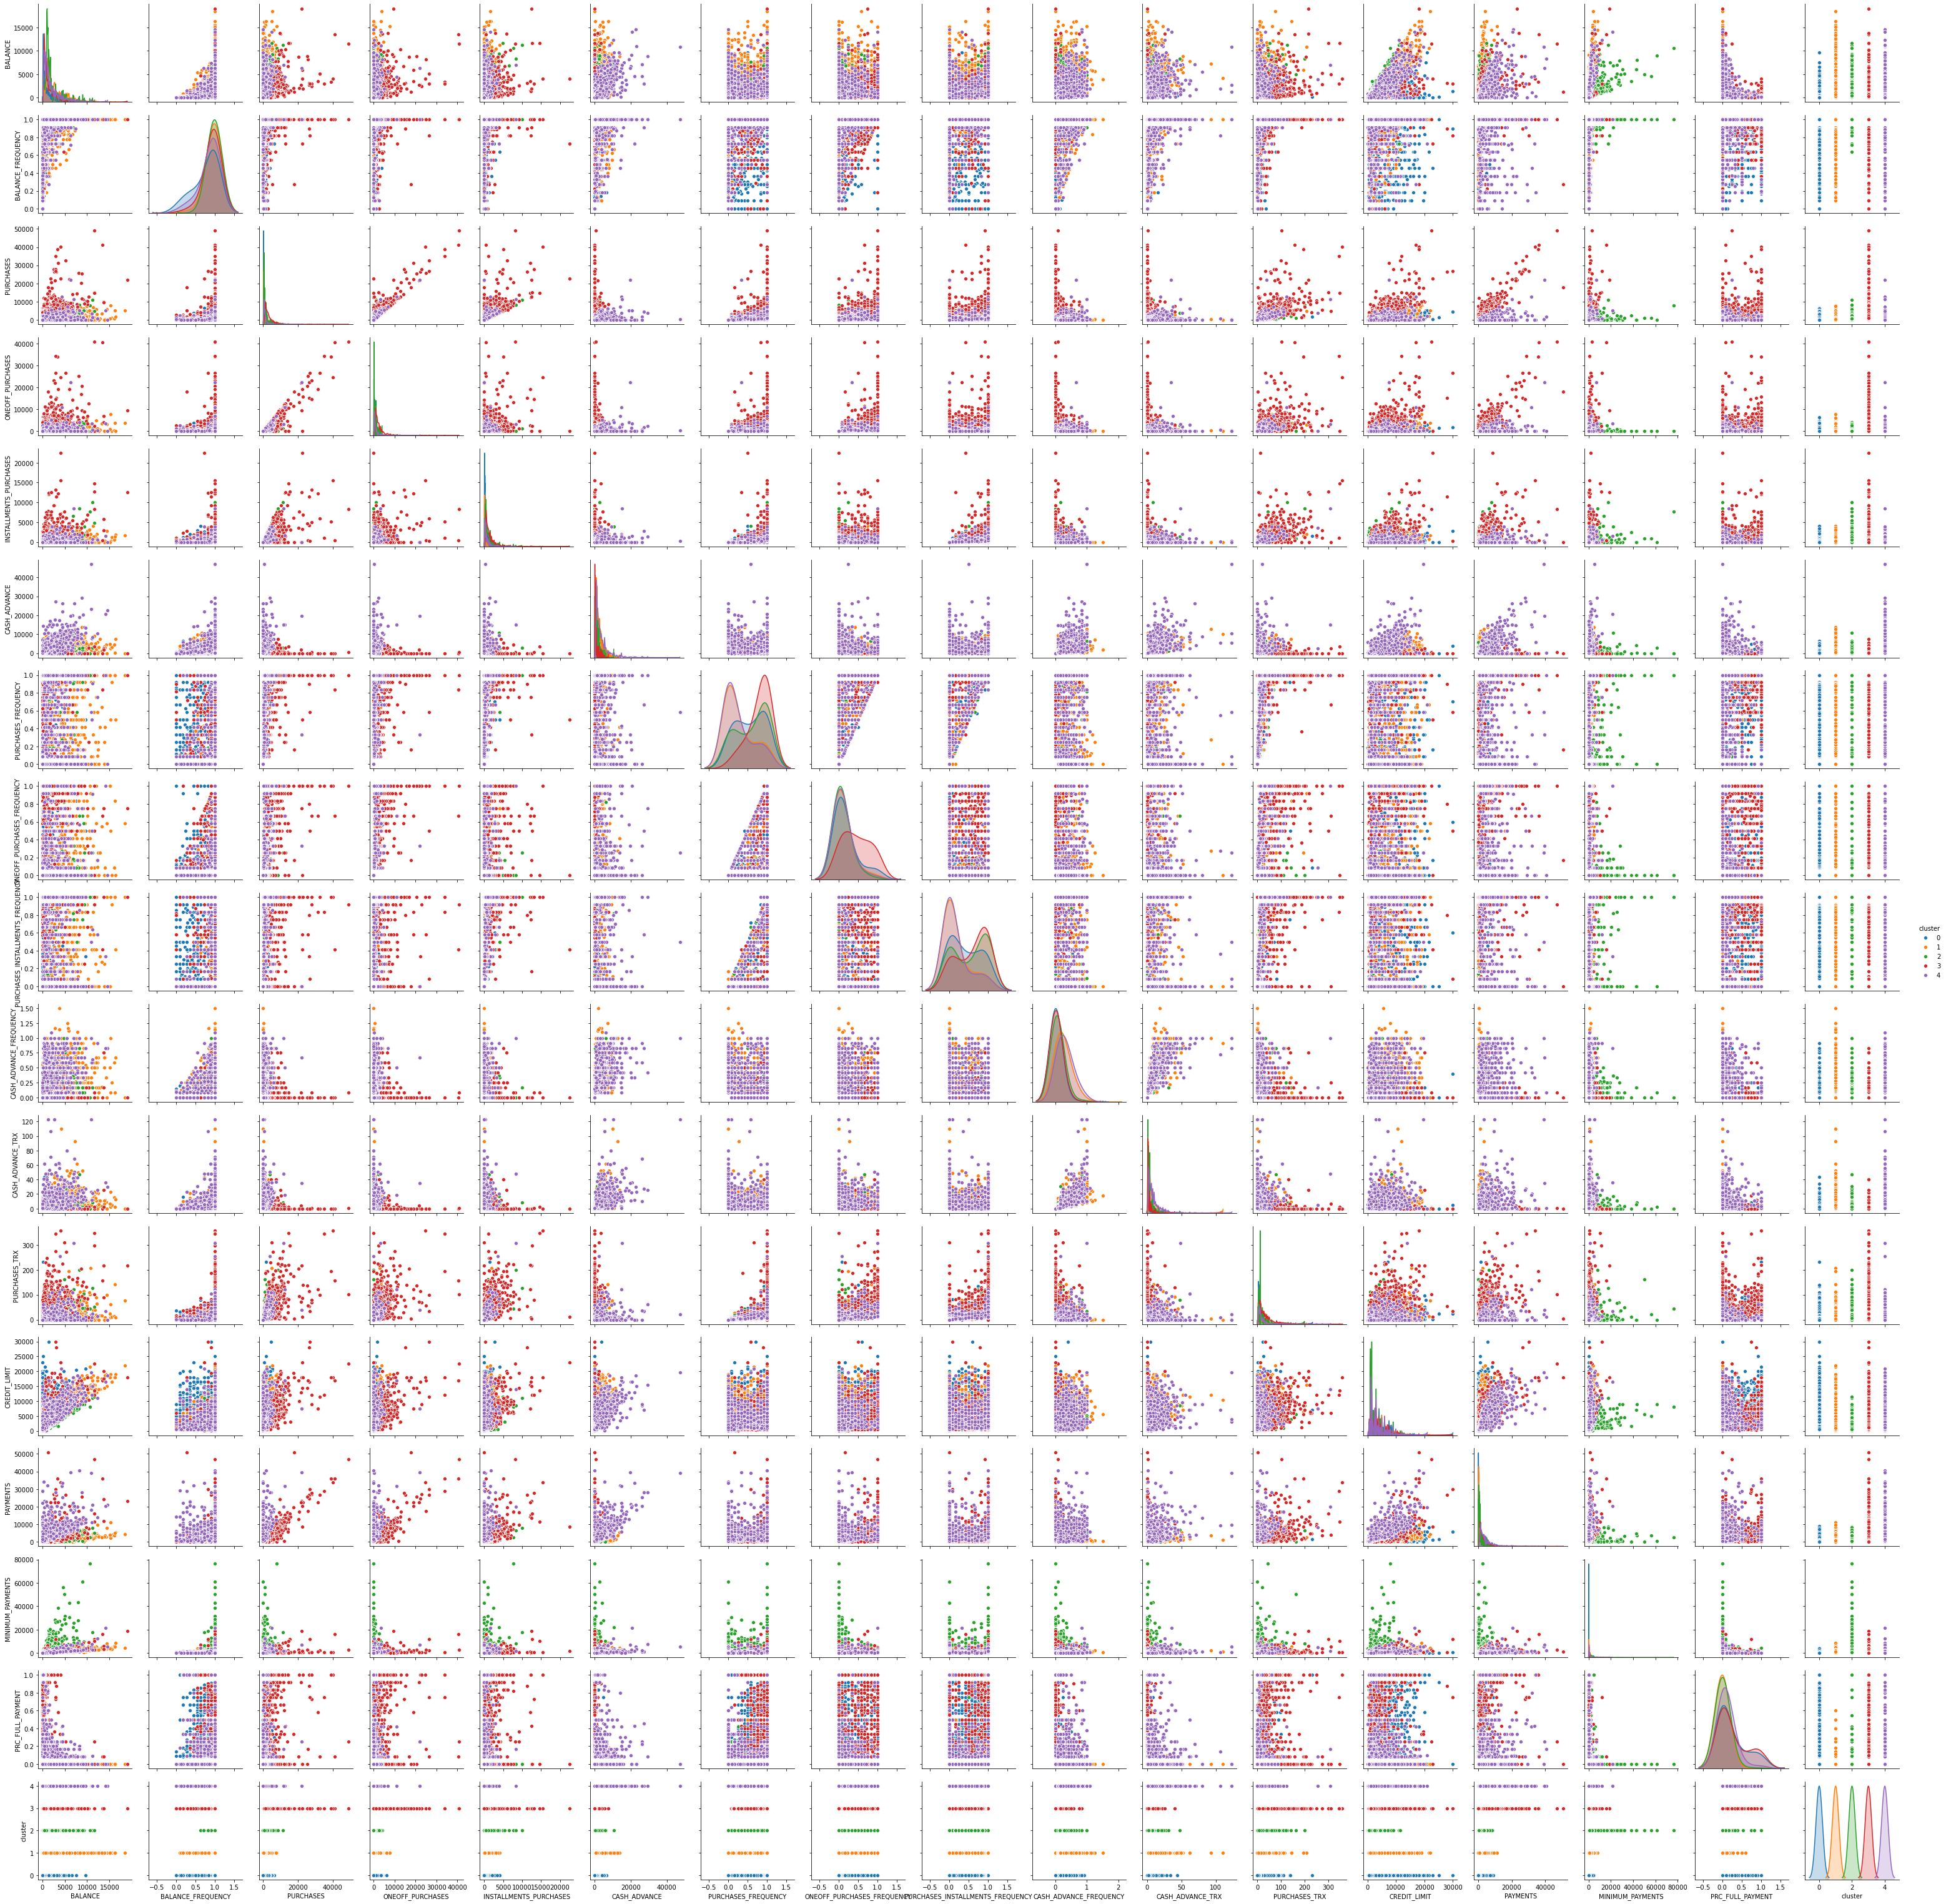

In [27]:
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)

import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster", diag_kws={'bw': 0.2})

# Aula 8

In [17]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3278.0   443.992358   846.597972   0.000000    23.315538   
1        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        1540.0  1142.222657  1664.035755   0.000000   211.566656   
4        1073.0  1794.764536  1982.173844   0.000000   507.076999   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.992153   411.193793   9630.367575            3278.0  0.774417   
1        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3         554.332740  1370.859355  19043.138560            1540.0  0.928053   
4        1088.056301  2315.003636  14581.459140            1073.0  0.862156   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.800040   4483.503862           3278.0  0.246549   
1        ...      1330.437428   8345.641905           2648.0  0.001800   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...       524.184580  18621.013310           1540.0  0.278582   
4        ...       886.322345  21235.065300           1073.0  0.117275   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346601  0.0  0.0  0.000000  0.444444  1.0  
1        0.023264  0.0  0.0  0.000000  0.000000  0.6  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.367203  0.0  0.0  0.083333  0.545455  1.0  
4        0.186801  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [18]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91386971e-02 2.30552524e-04 1.21267798e-01 4.80255998e-02
  7.33425496e-02 2.43607736e-02 1.72581896e-04 3.37097813e-05
  1.40021986e-04 7.93309218e-06 1.24113667e-04 2.86037895e-03
  9.43728649e-01 1.53557708e-01 5.68217245e-02 7.57977264e-05]
 [5.04294070e-01 2.72242076e-04 6.17554553e-02 3.62405829e-02
  2.55365937e-02 2.52765717e-01 6.72943541e-05 2.57072238e-05
  4.50409323e-05 5.74261583e-05 1.15669149e-03 1.33139220e-03
  7.19260678e-01 1.66160406e-01 1.79203910e-01 5.52512128e-07]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [1.59699490e-01 2.45649360e-04 4.38116859e-01 2.56325660e-01
  1.81962376e-01 2.57889184e-02 2.04826443e-04 8.87914942e-05
  1.51162866e-04 9.36296056e-06 1.69350945e-04 6.17145756e-03
  6.04336246e-01 4.02584838e-01 8.54128174e-02 7.26645255e-05]
 [2.

In [19]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [23]:
description = dataframe.groupby(["cluster"])[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.992358   629.345171    141.569301   5132.945933   814.477150   
1        3038.132314   385.096760   1636.114441   4496.336858   968.599396   
2        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
3        1142.222657  3268.886929    183.019398   4097.701397  3037.241495   
4        1794.764536   475.785508   3270.705696   3975.462453  4706.788521   

         n_clients  
cluster             
0             3278  
1             2648  
2              411  
3             1540  
4             1073  


# Aula 9

*A ordem dos clusters pode estar invertida aqui, porém não tem problema, cada linha vai representar um cluster diferente*.

**CLUSTER 0**: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

**CLUSTER 1**: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

**CLUSTER 2**: Clientes que gastam muito com compras. Melhores pagadores.

**CLUSTER 3**: Clientes que gastam muito com saques. Pagam as vezes.

**CLUSTER 4**: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [24]:
dataframe.groupby(["cluster"])["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
1,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
2,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
3,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0
4,1073.0,0.117275,0.186801,0.0,0.0,0.083333,0.142857,1.0
